# Apply Standard Scalar

Train and apply a standard scaler for a given partition.

## References
Mishra, P., & Passos, D. (2021). A synergistic use of chemometrics and deep learning improved the predictive performance of near-infrared spectroscopy models for dry matter prediction in mango fruit. Chemometrics and Intelligent Laboratory Systems, 212. [https://doi:10.1016/j.chemolab.2021.104287]()

## Specifiy Partition and Outlier Removal

In [6]:
PARTITION = "partition_1"
OUTLIER_FLAG = "outlier_flag_1"

## Setup

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [8]:
# read in all pretreated datasets
dfs = {
    0: pd.read_pickle("data/interim/pretreatment_0.pkl"),
    1: pd.read_pickle("data/interim/pretreatment_1.pkl"),
    2: pd.read_pickle("data/interim/pretreatment_2.pkl"),
    3: pd.read_pickle("data/interim/pretreatment_3.pkl")
}

# prepare dataset based on specified partition and outlier flag
for df_name, df in dfs.items():
    df.insert(loc=0, column="partition", value=df[PARTITION])
    df.insert(loc=1, column="train_partition", value=df[f"train_{PARTITION}"])
    df.drop(columns=[col for col in df.columns if col.startswith("partition_") and col != "partition_ext"], inplace=True)
    df.drop(columns=[col for col in df.columns if col.startswith("train_partition_")], inplace=True)
    df = df[df[OUTLIER_FLAG] == 0].copy()
    df.drop(columns=[col for col in df.columns if col.startswith("outlier_flag_")], inplace=True)
    dfs[df_name] = df

# look at partition size
df.groupby(["partition", "season"]).size()

partition   season
holdout     2020       4438
            2021        554
train       2015      14865
            2016      14583
            2017      26022
validation  2018      12432
            2019       5265
dtype: int64

In [9]:
dfs[1]

,partition,train_partition,subsequent_flag_1,sample_order_1,partition_ext,origin,population,date,season,region,...,963_savgol_d2,966_savgol_d2,969_savgol_d2,972_savgol_d2,975_savgol_d2,978_savgol_d2,981_savgol_d2,984_savgol_d2,987_savgol_d2,990_savgol_d2
0,train,calibration,0,28262,,published,100100,2015-09-27,2015,NT,...,-0.002284,-0.002370,-0.002319,-0.002167,-0.001931,-0.001664,-0.001437,-0.001224,-0.001095,-0.001008
1,train,calibration,0,80895,,published,100100,2015-09-27,2015,NT,...,-0.002294,-0.002360,-0.002297,-0.002137,-0.001910,-0.001666,-0.001444,-0.001268,-0.001123,-0.001012
2,train,calibration,0,31015,,published,100100,2015-09-27,2015,NT,...,-0.002539,-0.002598,-0.002525,-0.002361,-0.002106,-0.001810,-0.001529,-0.001289,-0.001107,-0.000965
3,train,calibration,0,563,,published,100100,2015-09-27,2015,NT,...,-0.002556,-0.002625,-0.002556,-0.002374,-0.002111,-0.001816,-0.001539,-0.001298,-0.001104,-0.000962
4,train,calibration,0,3737,,published,100100,2015-09-27,2015,NT,...,-0.002185,-0.002249,-0.002183,-0.002017,-0.001790,-0.001559,-0.001321,-0.001120,-0.000987,-0.000940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85396,holdout,calibration,4,6265,,marcelo,200800,NaT,2021,QLD,...,-0.001942,-0.002023,-0.002006,-0.001882,-0.001695,-0.001485,-0.001276,-0.001108,-0.000975,-0.000870
85397,holdout,calibration,4,54886,,marcelo,200800,NaT,2021,QLD,...,-0.001918,-0.002001,-0.001977,-0.001857,-0.001673,-0.001459,-0.001253,-0.001081,-0.000956,-0.000862
85398,holdout,calibration,4,76820,,marcelo,200800,NaT,2021,QLD,...,-0.001908,-0.002009,-0.001995,-0.001893,-0.001723,-0.001529,-0.001336,-0.001169,-0.001036,-0.000922
85399,holdout,calibration,4,860,,marcelo,200800,NaT,2021,QLD,...,-0.002194,-0.002312,-0.002301,-0.002184,-0.001977,-0.001731,-0.001494,-0.001303,-0.001150,-0.001023


In [10]:
dfs[2]

,partition,train_partition,subsequent_flag_1,sample_order_1,partition_ext,origin,population,date,season,region,...,963_snv_savgol_d2,966_snv_savgol_d2,969_snv_savgol_d2,972_snv_savgol_d2,975_snv_savgol_d2,978_snv_savgol_d2,981_snv_savgol_d2,984_snv_savgol_d2,987_snv_savgol_d2,990_snv_savgol_d2
0,train,calibration,0,28262,,published,100100,2015-09-27,2015,NT,...,-0.000689,-0.000652,-0.000545,-0.000692,-0.000713,-0.000533,-0.000311,-0.000021,-0.000020,0.000464
1,train,calibration,0,80895,,published,100100,2015-09-27,2015,NT,...,-0.000666,-0.000579,-0.000633,-0.000474,-0.000260,-0.000138,-0.000078,-0.000212,-0.000311,-0.000463
2,train,calibration,0,31015,,published,100100,2015-09-27,2015,NT,...,-0.003205,-0.003079,-0.002673,-0.001972,-0.001382,-0.001070,-0.000822,-0.000583,-0.000252,0.000008
3,train,calibration,0,563,,published,100100,2015-09-27,2015,NT,...,-0.003146,-0.003209,-0.002865,-0.002379,-0.001880,-0.001276,-0.000681,-0.000330,-0.000132,0.000161
4,train,calibration,0,3737,,published,100100,2015-09-27,2015,NT,...,-0.000108,0.000404,0.000843,0.000627,0.000680,0.000895,0.000739,0.000435,0.000455,0.000680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85396,holdout,calibration,4,6265,,marcelo,200800,NaT,2021,QLD,...,0.001830,0.001996,0.002129,0.002077,0.001870,0.001804,0.001618,0.001420,0.001212,0.001034
85397,holdout,calibration,4,54886,,marcelo,200800,NaT,2021,QLD,...,0.002235,0.002260,0.002138,0.002101,0.002108,0.001978,0.001739,0.001564,0.001304,0.001262
85398,holdout,calibration,4,76820,,marcelo,200800,NaT,2021,QLD,...,0.002218,0.002130,0.001985,0.001866,0.001776,0.001456,0.001164,0.000804,0.000540,0.000545
85399,holdout,calibration,4,860,,marcelo,200800,NaT,2021,QLD,...,-0.000513,-0.000715,-0.000719,-0.000455,-0.000096,-0.000018,0.000136,0.000148,0.000057,-0.000015


## Apply Standard Scalar on Datasets

In [11]:
dfs_scaled = {}

for df_name, df in dfs.items():
    
    # get the 'x' columns
    x_cols = df.filter(regex="^\d+", axis=1).columns.tolist()

    # get the descriptive columns, including 'y' column
    descriptive_cols = [col for col in df.columns if col not in x_cols]

    # train scaler using the entire training set
    scaler = StandardScaler()
    scaler.fit(X=df.query("partition == 'train'")[x_cols])

    # Apply scaler to the x cols
    dfs_scaled[df_name] = df.copy()  # make a copy of the unscaled dataframe
    dfs_scaled[df_name][x_cols] = scaler.transform(df[x_cols])

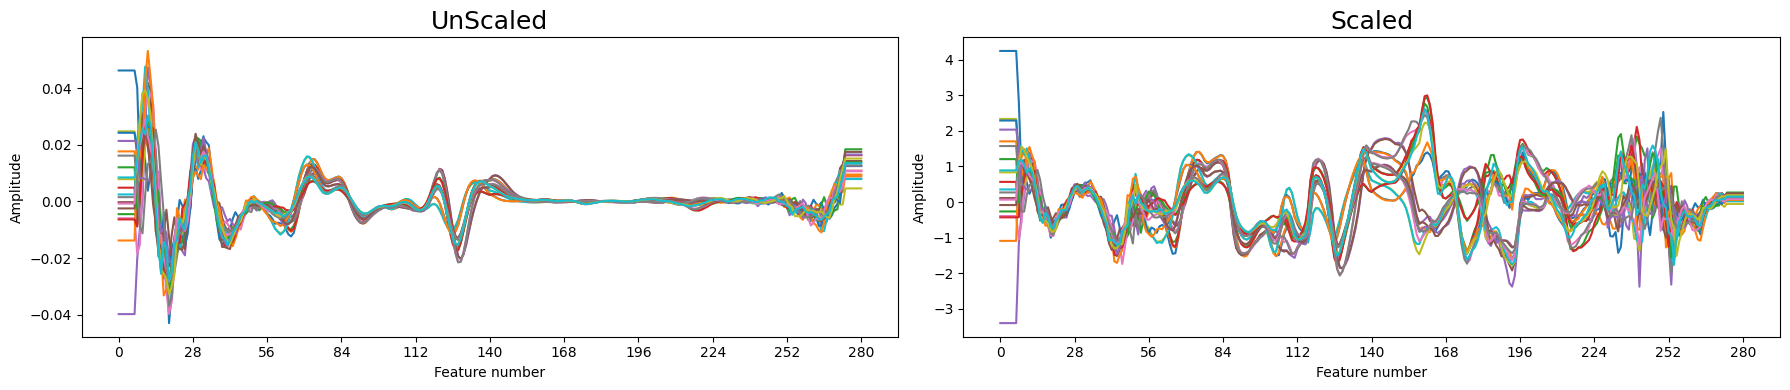

In [12]:
# visualise unscaled and scaled data
pretreatment = 3
x_cols = dfs[pretreatment].filter(regex="^\d+", axis=1).columns.tolist()

plt.figure(figsize=(18, 4))

# left panel
plt.subplot(121)
plt.title("UnScaled", fontsize=18)
plt.plot(dfs[pretreatment][x_cols][:20].T)
plt.ylabel("Amplitude")
plt.xlabel("Feature number")
plt.xticks(ticks=range(0, len(x_cols), len(x_cols) // 10), labels=range(0, len(x_cols), len(x_cols) // 10))

# right panel
plt.subplot(122)
plt.title("Scaled", fontsize=18)
plt.plot(dfs_scaled[pretreatment][x_cols][:20].T)
plt.ylabel("Amplitude")
plt.xlabel("Feature number")
plt.xticks(ticks=range(0, len(x_cols), len(x_cols) // 10), labels=range(0, len(x_cols), len(x_cols) // 10))

plt.tight_layout()
plt.show()

## Output data

In [13]:
for df_name, df in dfs.items():
    df.to_pickle(f"data/prepared/pretreatment_{df_name}_scaled_{PARTITION.lower()}_{OUTLIER_FLAG.lower()}.pkl")